<a href="https://colab.research.google.com/github/Shantanu9326/Data-Science-Portfolio/blob/master/Restaurant_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/app/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [0]:
# Cleaning the texts
# Importing Libraries
import re #Regular Expression
import nltk #Natural Language Library
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #Porter Stemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower() #Lowercase
    review = review.split()
    ps = PorterStemmer() #Apply Porter Stemmer
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
print(X)
print('\n')
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

[[55 42]
 [12 91]]


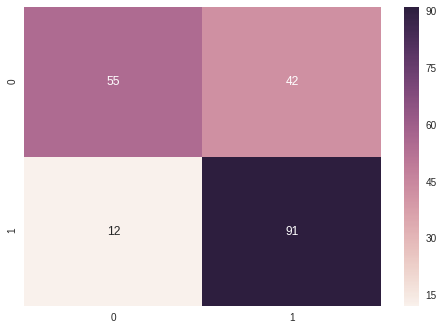

In [0]:
# Making the Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [0]:
from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

Accuracy:0.73


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred,target_names=['Negative', 'Positive'])
print(cr)

             precision    recall  f1-score   support

   Negative       0.65      0.90      0.76        97
   Positive       0.85      0.55      0.67       103

avg / total       0.76      0.72      0.71       200



[0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0]
[[76 21]
 [37 66]]
Accuracy:0.71
             precision    recall  f1-score   support

   Negative       0.67      0.78      0.72        97
   Positive       0.76      0.64      0.69       103

avg / total       0.72      0.71      0.71       200



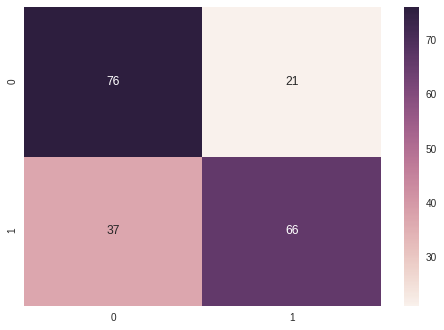

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

# Making the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred,target_names=['Negative', 'Positive'])
print(cr)

[0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0]
[[74 23]
 [55 48]]
Accuracy:0.61
             precision    recall  f1-score   support

   Negative       0.57      0.76      0.65        97
   Positive       0.68      0.47      0.55       103

avg / total       0.63      0.61      0.60       200



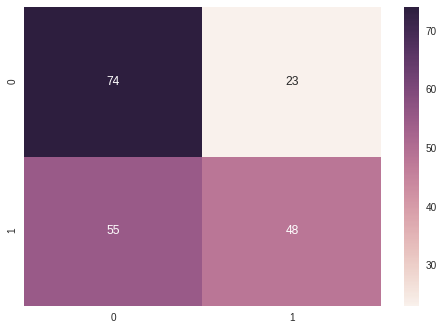

In [0]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

# Making the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred,target_names=['Negative', 'Positive'])
print(cr)

[0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0
 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1]
[[74 23]
 [33 70]]
Accuracy:0.72
             precision    recall  f1-score   support

   Negative       0.69      0.76      0.73        97
   Positive       0.75      0.68      0.71       103

avg / total       0.72      0.72      0.72       200



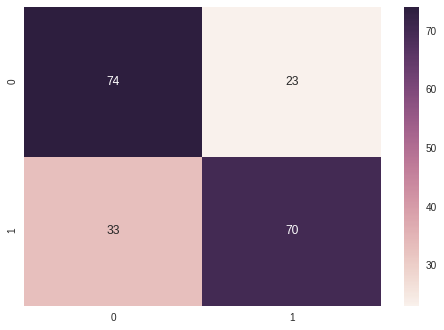

In [0]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

# Making the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred,target_names=['Negative', 'Positive'])
print(cr)

[0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0]
[[74 23]
 [35 68]]
Accuracy:0.71
             precision    recall  f1-score   support

   Negative       0.68      0.76      0.72        97
   Positive       0.75      0.66      0.70       103

avg / total       0.71      0.71      0.71       200



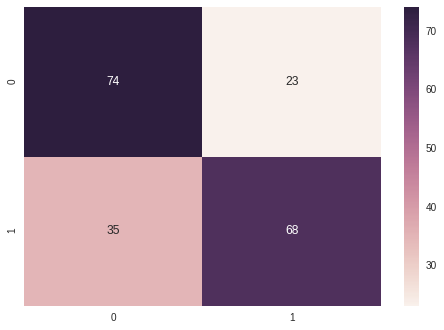

In [0]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

# Making the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred,target_names=['Negative', 'Positive'])
print(cr)


[0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0]
[[87 10]
 [46 57]]
Accuracy:0.72
             precision    recall  f1-score   support

   Negative       0.65      0.90      0.76        97
   Positive       0.85      0.55      0.67       103

avg / total       0.76      0.72      0.71       200



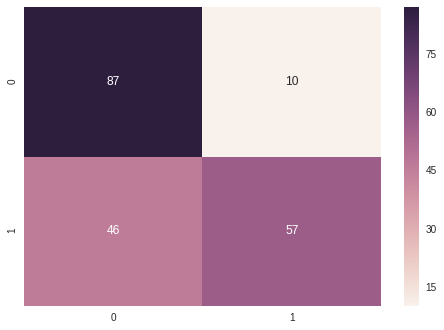

In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')

# Making the Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred,target_names=['Negative', 'Positive'])
print(cr)

#Conclusion

Naive Bayes has the highest precision, while Decision Tree and Random Forest has the highest recall. F1 score for the Decision Tree & Random Forest are higher because of the high recall. However, in most cases having high precision is preferable to high recall, because the consequences of many false negatives is usually worse (in this case giving many restaurants a bad reputation by mistake).

Here are all my results:

####Logistic regression
Accuracy: 0.71
Precision: 0.67
Recall: 0.78
F1 score: 0.72

####K-Nearest Neighbor
Accuracy: 0.61
Precision: 0.57
Recall: 0.76
F1 score: 0.65

####SVM
Accuracy: 0.72
Precision: 0.69
Recall: 0.76
F1 score: 0.73

####Kernel SVM 
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 score: 0.65

####Naive Bayes
Accuracy: 0.73
Precision: 0.82
Recall: 0.57
F1 score: 0.67

####Decision Tree
Accuracy: 0.71
Precision: 0.68
Recall: 0.76
F1 score: 0.72

####Random Forest
Accuracy: 0.72
Precision: 0.65
Recall: 0.90
F1 score: 0.76